In [1]:
# import usual things
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# randomly generated
data = np.random.random( (10, 10) )

In [4]:
data.shape

(10, 10)

In [5]:
# made a widget label
mySelectedLabel = ipywidgets.Label()

In [6]:
# first, just print out what is changing, what is selected
# only support 1 selected grid
def on_selected(change):
    if len(change['owner'].selected) == 1:
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data[i,j] # grabbing the underlying datavalue associated with this row/column
        mySelectedLabel.value = 'Data Value = ' + str(v)
    
# 1. Data -- see above

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data, scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

In [7]:
# same thing but with 3d data
data3d = np.random.random( (10,10, 20) ) # x, y, z => 20 data points along each of my 10x10 2D data

In [9]:
data3d.shape

(10, 10, 20)

In [10]:
# let's say I select the 0,0 in x/y
i,j = 0,0

data3d[i,j,:] # want to make a histogram showing the distribution of the 20 z-values

array([0.10740443, 0.74470142, 0.19229035, 0.84488106, 0.32292487,
       0.47342931, 0.76429981, 0.84237637, 0.67513143, 0.83897512,
       0.05522585, 0.7714165 , 0.33819357, 0.77269463, 0.76369213,
       0.41270772, 0.19275517, 0.11310302, 0.84427655, 0.20992362])

In [11]:
# show the mean of this 20-value data subset in our label
data3d[i,j,:].mean()

0.5140201458769522

In [12]:
# for our heatmap we'll show the mean long the z-axis
data3d.mean(axis=2)

array([[0.51402015, 0.53594394, 0.42514304, 0.48573713, 0.49441383,
        0.40399138, 0.49196227, 0.60690266, 0.4287081 , 0.53248343],
       [0.61736103, 0.51763737, 0.48704065, 0.4789036 , 0.4535039 ,
        0.51361254, 0.42916072, 0.39714522, 0.48685207, 0.41268841],
       [0.46748848, 0.48514657, 0.52227507, 0.5148607 , 0.4785674 ,
        0.55635781, 0.48934847, 0.44878893, 0.49655008, 0.5004273 ],
       [0.516449  , 0.53025024, 0.47784436, 0.53769679, 0.59111546,
        0.56164068, 0.46666796, 0.51294003, 0.58534514, 0.4408948 ],
       [0.48863847, 0.4775987 , 0.51225701, 0.42219093, 0.51802596,
        0.43982807, 0.48578078, 0.5466839 , 0.48674801, 0.56031112],
       [0.55443661, 0.58041662, 0.40441371, 0.5812742 , 0.39902485,
        0.50754199, 0.4876281 , 0.46608038, 0.47814113, 0.43985146],
       [0.49333512, 0.55645816, 0.543309  , 0.40487185, 0.52387674,
        0.36952311, 0.59921562, 0.40983789, 0.38073061, 0.44768004],
       [0.47440198, 0.60857754, 0.4698332

In [13]:
data3d.mean(axis=2).shape

(10, 10)

In [15]:
# first, just print out what is changing, what is selected
# only support 1 selected grid
def on_selected(change):
    if len(change['owner'].selected) == 1:
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGED THIS FOR 3D DATA!!!
        mySelectedLabel.value = 'Mean Data Value (along z-axis) = ' + str(v)
    
# 1. Data -- data3d (now 3D data)

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right', label='Mean') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2), scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

First things first, before doing the whole dashboard, let's just make a *static* histogram.

In [22]:
# 1. Data -- data for the histogram
i, j = 0, 1 # right now, this is fixed
data3d[i,j]

array([0.49020448, 0.54707489, 0.80702874, 0.87599773, 0.68039928,
       0.38325824, 0.3095196 , 0.64916817, 0.12032042, 0.60093292,
       0.7689658 , 0.43414547, 0.90487497, 0.52806865, 0.08884202,
       0.0962388 , 0.3786375 , 0.88579658, 0.40479412, 0.76461044])

In [23]:
# 2. Scales -- histogram, linear scales for numerical values
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

In [24]:
# 3. Axis -- x & y
ax_xh = bqplot.Axis(scale=x_sch, label='Value of 3rd Axis') # binning into here
ax_yh = bqplot.Axis(scale=y_sch, orientation='vertical', label='Frequency')

In [25]:
# 4. Marks
bqplot.Hist?

In [26]:
hist = bqplot.Hist(sample = data3d[i,j], 
                  normalized=False,
                  scales={'sample':x_sch, 'count': y_sch}, # sample = data, x, count is calculate in this mark
                  bins=5)

In [27]:
figh = bqplot.Figure(marks=[hist], axes=[ax_xh, ax_yh])
figh

Figure(axes=[Axis(label='Value of 3rd Axis', scale=LinearScale(), side='bottom'), Axis(label='Frequency', orie…

The final piece is figuring out what to change in our histogram mark when the grid selection is updated.

In [28]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [29]:
hist.sample

array([0.49020448, 0.54707489, 0.80702874, 0.87599773, 0.68039928,
       0.38325824, 0.3095196 , 0.64916817, 0.12032042, 0.60093292,
       0.7689658 , 0.43414547, 0.90487497, 0.52806865, 0.08884202,
       0.0962388 , 0.3786375 , 0.88579658, 0.40479412, 0.76461044])

In [30]:
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGED THIS FOR 3D DATA!!!
        mySelectedLabel.value = 'Mean Data Value (along z-axis) = ' + str(v)
        # Add in what changes for our histogram
        hist.sample = data3d[i,j]

Building dashboard componenets -- #1 heatmap

In [31]:
# 1. Data -- see above

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data, scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!

#2 we'll add in the histogram generation

In [32]:
# 2. Scales -- histogram, linear scales for numerical values
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

# 3. Axis -- x & y
ax_xh = bqplot.Axis(scale=x_sch, label='Value of 3rd Axis') # binning into here
ax_yh = bqplot.Axis(scale=y_sch, orientation='vertical', label='Frequency')

i, j = 0,0 # to start, this is hardcoded
hist = bqplot.Hist(sample = data3d[i,j], 
                  normalized=False,
                  scales={'sample':x_sch, 'count': y_sch}, # sample = data, x, count is calculate in this mark
                  bins=5)

figh = bqplot.Figure(marks=[hist], axes=[ax_xh, ax_yh])

Put it all together into a dashboard:

In [33]:
figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

In [34]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
figh.layout.min_width='500px'

figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

One more thing: variable bin size for histogram.

In [35]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [36]:
hist.bins # a trait of our histogram mark

5

In [37]:
bins_slider = ipywidgets.IntSlider(value=5, min=1, max=data3d.shape[2])

In [38]:
bins_slider

IntSlider(value=5, max=20, min=1)

In [39]:
ipywidgets.jslink( (bins_slider,'value'), (hist, 'bins') )

Link(source=(IntSlider(value=14, max=20, min=1), 'value'), target=(Hist(bins=5, colors=['steelblue'], count=ar…

In [40]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
figh.layout.min_width='500px'

figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# control panel (bins)
controls = ipywidgets.HBox([mySelectedLabel, bins_slider])

# label on top
myDashboard = ipywidgets.VBox([controls, figures])
myDashboard

## Next: a "real" dataset -- UFOs

In [41]:
ufos = pd.read_csv("ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [42]:
len(ufos)

80332

In [43]:
nsamples = 1000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
downSampleMask

array([63704, 23968, 66808, 12778, 70685, 41440, 59456, 35556, 76314,
       16188, 28433, 57178,  7703, 66015,  7364, 64954, 45990, 59313,
       24620, 42272, 59512, 33739, 67680, 19022, 58521, 46715, 33826,
       10098, 59596, 38268, 33416, 58337, 60216, 52650, 27331,  7656,
       43176, 70284, 39414, 55220, 58869, 77007, 58743, 39322, 22008,
       58259, 51944, 29207, 79785, 25958, 50044, 35848, 21573,  5885,
         471, 57163, 70585, 60883, 49247, 63089,  4037, 70621, 31635,
       52623, 66718, 79493, 36662,  5359,  9890, 46259, 16742, 20673,
       43052, 43788,   453, 49236,  9258, 31507, 79609, 51348,  5808,
        4155, 11866,    37, 25345, 54049, 38667, 75406, 17540, 39921,
       66657, 48827, 26456, 24553, 12759, 79103, 17435, 68863, 71507,
       26127, 43125, 22992, 37110, 22236,   172, 51574, 49744, 23628,
       41921, 31099, 30713, 20992, 67344,  4131, 30831, 76287, 50362,
       29804, 56186, 68697, 51012, 57890,   891, 64643, 15727, 47580,
       67159, 49072,

In [44]:
ufosDS = ufos.loc[downSampleMask] # this is an example of a mask! (filtering)

In [45]:
len(ufosDS)

1000

In [46]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
63704,1995-07-08 23:00:00,ravenna,oh,us,unknown,600.0,10 minutes,red lights and slow moving objest over sait m...,2006-05-15,41.157500,-81.242222
23968,2012-01-29 23:30:00,wells,me,us,fireball,5.0,5 seconds,Green Fire ball with an Orange nose falling at...,2012-02-03,43.321944,-70.581389
66808,2011-08-15 17:00:00,hamburg,ny,us,other,20.0,20 seconds,This was a large craft all black. Mt daughter ...,2011-12-12,42.715833,-78.829722
12778,2009-11-24 18:00:00,wellsboro,pa,us,other,600.0,10min,light following another&#44no sound&#44no flas...,2009-12-12,41.748611,-77.300833
70685,2008-08-30 20:45:00,ashtabula,oh,us,changing,240.0,approx 4mins,A cluster of clear sphere like objects that we...,2008-10-31,41.865000,-80.790000
...,...,...,...,...,...,...,...,...,...,...,...
73147,2004-09-11 22:00:00,riverdale,ut,us,light,120.0,1-2 minutes,Slow moving&#44 bright light&#44 with no flash...,2004-09-29,41.176944,-112.003056
3410,1999-10-21 11:55:00,kansas city,mo,us,cylinder,1200.0,20 minutes,I and four other people watched a very large c...,1999-11-09,39.099722,-94.578333
11601,2005-11-20 19:00:00,findlay,oh,us,other,3600.0,approx. 1 hour,Large bright light in southwest sky. ((NUFORC...,2005-12-16,41.044167,-83.650000
37519,1976-04-18 17:00:00,marianna,fl,us,oval,5.0,aprox 5 sec,the object was oval shaped and at the tipical...,2005-09-02,30.774167,-85.226944


Super quick scatter plot of this data:

In [47]:
# (data will be the long/lat columsn)

# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], 
                         scales={'x':x_sc, 'y':y_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

In [49]:
# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')
ax_c = bqplot.ColorAxis(scale = c_sc, label='Duration in sec', orientation='vertical', side='right')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], color=ufosDS['duration_seconds'],
                         scales={'x':x_sc, 'y':y_sc, 'color':c_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y, ax_c])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

In [50]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(0.05, 1814400.0)

In [51]:
# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')
ax_c = bqplot.ColorAxis(scale = c_sc, label='log10(sec)', orientation='vertical', side='right')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], color=np.log10(ufosDS['duration_seconds']),
                         scales={'x':x_sc, 'y':y_sc, 'color':c_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y, ax_c])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

A quick trip back to matplotlib!

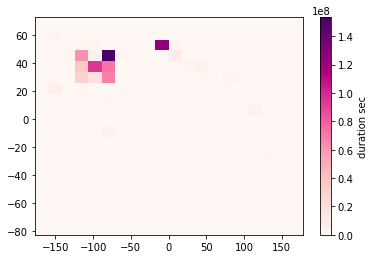

In [54]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
          bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('duration sec')

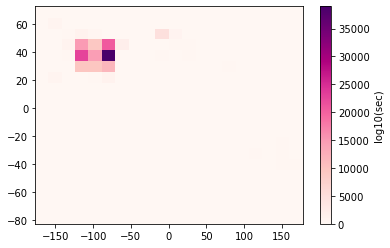

In [55]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=np.log10(ufos['duration_seconds']), # doing the binning with logs
          bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('log10(sec)')

In [56]:
import matplotlib.colors as mpl_colors

In [57]:
mpl_colors.SymLogNorm?

<ipython-input-59-e7ae35545624>:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  bins=20, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))


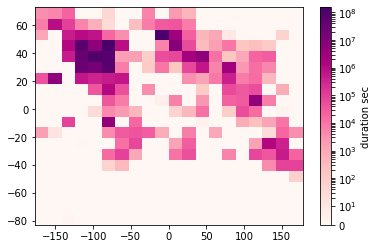

In [59]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
          bins=20, cmap='RdPu', norm=mpl_colors.SymLogNorm(10)) # a little reminder about norm of colorspace
cb = plt.colorbar() # want colorbar to be in log-space
cb.set_label('duration sec')

Here: histogram the data "by hand" and feed this into bqplot.

In [60]:
nlong = 20
nlat = 20

hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], ufos['latitude'], 
                                              weights=ufos['duration_seconds'], 
                                              bins=[nlong, nlat])

In [62]:
hist2d.shape

(20, 20)

In [63]:
hist2d.min(), hist2d.max()

(0.0, 153348519.88)

Because I already have gridded data, the matplotlib function I want to use is imshow instead of hist2d:

<ipython-input-65-7b9a5b72c7f3>:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(hist2d, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))


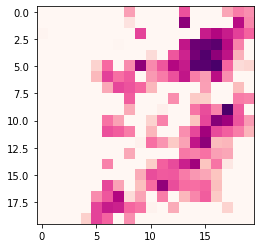

In [65]:
plt.imshow(hist2d, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

<ipython-input-66-f84957fd202f>:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))


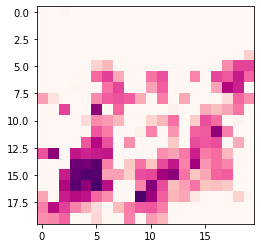

In [66]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

A little weirdness -- bqplot actually expects this transposed (upside down) dataset!

In [67]:
hist2d.shape

(20, 20)

In [68]:
long_edges.shape

(21,)

In [69]:
lat_edges.shape

(21,)

In [70]:
long_centers = (long_edges[:-1] + long_edges[1:])/2 # 30% on this is totally fine!

In [71]:
long_edges

array([-176.6580556 , -158.90305782, -141.14806004, -123.39306226,
       -105.63806448,  -87.8830667 ,  -70.12806892,  -52.37307114,
        -34.61807336,  -16.86307558,    0.8919222 ,   18.64691998,
         36.40191776,   54.15691554,   71.91191332,   89.6669111 ,
        107.42190888,  125.17690666,  142.93190444,  160.68690222,
        178.4419    ])

In [72]:
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [73]:
# specify the bins for each lat & long
long_bins = np.linspace(-150, 150, nlong+1)

In [74]:
long_bins

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [75]:
lat_bins = np.linspace(-40, 70, nlat+1)

In [76]:
lat_bins

array([-40. , -34.5, -29. , -23.5, -18. , -12.5,  -7. ,  -1.5,   4. ,
         9.5,  15. ,  20.5,  26. ,  31.5,  37. ,  42.5,  48. ,  53.5,
        59. ,  64.5,  70. ])

In [78]:
# use these bins to make my histogram
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], ufos['latitude'], 
                                              weights=ufos['duration_seconds'],
                                              bins=[long_bins, lat_bins])

In [80]:
long_edges

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [81]:
long_centers = (long_edges[:-1] + long_edges[1:])/2 # 30% on this is totally fine!
lat_centers = (lat_edges[:-1] + long_edges[1:])/2

In [82]:
hist2d = hist2d.T

In [83]:
hist2d.min(), hist2d.max()

(0.0, 125056847.51)

In [84]:
np.log10(hist2d.min())

<ipython-input-84-4e5e124bd84c>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(hist2d.min())


-inf

In [85]:
# we are going to be a little tricky!
hist2d[hist2d <= 0] = np.nan # filtering operation

In [86]:
hist2dlog = np.log10(hist2d)

It turns out that even though we'll have NaN's in our dataset, bqplot will plot this as a black background in a GridHeatMap mark!

In [88]:
#hist2dlog

In [89]:
# 1. Data -- WE DID A LOT HERE!!
# having to do a lot of pre-viz data formatting

# 2. Scales
col_sc = bqplot.ColorScale(scheme="RdPu", min=np.nanmin(hist2dlog), max=np.nanmax(hist2dlog)) 
x_sc = bqplot.LinearScale() # numerical, long
y_sc = bqplot.LinearScale() # numerical, lat

In [90]:
# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc, label='Longitude') # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')


In [91]:
# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = hist2dlog, 
                              row = lat_centers,
                              column = long_centers,
                              scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})


In [95]:
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

In [102]:
# 1. Data -- WE DID A LOT HERE!!
# having to do a lot of pre-viz data formatting

# 2. Scales
col_sc = bqplot.ColorScale(scheme="RdPu", min=np.nanmin(hist2dlog), max=np.nanmax(hist2dlog)) 
x_sc = bqplot.LinearScale() # numerical, long
y_sc = bqplot.LinearScale() # numerical, lat

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc, label='Longitude') # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = hist2dlog, 
                              row = lat_centers,
                              column = long_centers,
                              scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. interactivity
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2dlog[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'Weighted binning (log(duration in sec)) = ' + str(v)
        ##### Add in what changes for our histogram
        ####hist.sample = data3d[i,j]
# make sure we are observing for changes in our heatmap
heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
#fig

# dashboard with my label
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [100]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


We binned our data, *but* if we want to make another plot with data in another axis of our original set (distribution of durations).

In [103]:
i, j = 19, 0 # I know this has lots of data!

In [106]:
region_mask = ( (ufos['latitude'] >= lat_edges[j]) & (ufos['latitude'] <= lat_edges[j+1]) & \
              (ufos['longitude'] >= long_edges[i]) & (ufos['longitude'] <= long_edges[i+1]))

In [107]:
ufos['latitude'][region_mask]

112     -34.928661
682     -37.653829
855     -34.928661
998     -37.813938
1850    -37.966667
           ...    
76956   -37.883333
78037   -34.928661
78381   -38.382766
78598   -35.276030
80217   -37.813938
Name: latitude, Length: 211, dtype: float64

In [108]:
lat_edges[j], lat_edges[j+1]

(-40.0, -34.5)

In [111]:
# example: I want to make a histogram of the duration_seconds in this particular bin
# hist.sample = ufos['duration_seconds'][region_mask].values

ufos['duration_seconds'][region_mask].values

array([6.00e+02, 4.00e+01, 3.00e+02, 9.00e+02, 6.00e+02, 1.50e+03,
       1.20e+02, 5.00e+00, 9.00e+02, 3.00e+01, 1.80e+02, 3.60e+02,
       6.00e+02, 1.20e+02, 6.00e+01, 1.50e+01, 6.00e+02, 1.00e+01,
       3.00e+02, 3.00e+01, 6.00e+01, 7.00e+00, 3.20e+01, 3.00e+01,
       1.20e+03, 6.00e+02, 2.70e+03, 6.00e+01, 3.00e+00, 6.00e+01,
       6.00e+01, 1.80e+03, 2.40e+02, 3.60e+03, 9.00e+02, 5.00e+00,
       3.60e+03, 1.50e+01, 6.00e+02, 6.00e+01, 6.00e+01, 6.00e+02,
       2.40e+02, 3.00e+02, 3.00e+02, 6.00e+02, 3.00e+02, 6.00e+02,
       7.20e+03, 1.80e+02, 6.00e+01, 6.00e+01, 9.00e+02, 3.00e+02,
       1.80e+02, 2.70e+03, 3.00e+02, 1.00e+00, 6.00e+02, 3.00e+01,
       3.60e+03, 6.00e+01, 1.80e+02, 5.00e+00, 6.00e+01, 3.00e+01,
       1.20e+02, 1.00e+01, 1.50e+01, 5.00e-01, 3.00e+02, 4.80e+02,
       9.00e+01, 1.80e+02, 1.20e+02, 1.20e+03, 3.00e+02, 6.00e+02,
       7.20e+02, 1.00e+01, 3.00e+02, 2.40e+03, 6.00e+02, 6.00e+02,
       4.20e+02, 9.00e+02, 1.08e+04, 1.80e+02, 2.00e+01, 1.00e

In [123]:
# few possibly useful things for this dataset!
# ... shoulda come to class ;)